## Name: FATIK JAN
## Student ID: 21031182

# Urban population and Climate Change

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import wbgapi as wb

Reading Data

In [12]:
def read_Data(filename):
    '''
    Given a filename returns two dataframes one with 
    country as columns and the other as years
    '''
    f = open(filename,'r')
    lines = f.readlines()
    c = open(f'{filename.split(".")[0]}_data.csv','w')
    c.writelines(lines[4:])
    f.close()
    c.close()
    df = pd.read_csv(f'{filename.split(".")[0]}_data.csv')    
    df1 = df.set_index('Country Name').drop(['Country Code', 'Indicator Name','Indicator Code','Unnamed: 65'],1)
    df2 = df1.transpose()
    return df1, df2

In [13]:
def find_corr(df1,df2,col):
    '''
    Finds the correlation between two features given a column (country)
    '''
    series1 = df1[col].dropna()
    series2 = df2[col].dropna()
    corr = pd.DataFrame({'s1':series1, 's2':series2}).corr()
    return corr['s1']['s2']

In [14]:
#reading emmissions data
em_df1, em_df2 = read_Data('API_EN.ATM.CO2E.PC_DS2_en_csv_v2_3731558.csv')

In [15]:
#reading urban population data
urban_df1, urban_df2 = read_Data('API_SP.URB.TOTL.IN.ZS_DS2_en_csv_v2_3732226.csv')

Urban population is the population of people living in metropolitan cities. Metropolitan cities are responsible for a lot of the carbon emissions since a lot of the industry and transport are present there.

Let's take a look at which countries' urban population is strongly correlated with carbon emissions.

In [17]:
find_corr(em_df2,urban_df2,'China')

0.9735819904230407

In [81]:
def correlation_of_countries(countries,df1,df2):
    corr_dict = dict()
    for country in countries:
        corr_dict[country] = find_corr(df1,df2,country)
    corr_ser = pd.Series(corr_dict).dropna()
    return corr_ser.sort_values()
    

In [82]:
countries = urban_df1.index   
corr_dict = correlation_of_countries(countries,em_df2,urban_df2)

In [83]:
corr_dict

Tuvalu                 -0.996398
Aruba                  -0.951589
Germany                -0.950319
United Kingdom         -0.936866
Luxembourg             -0.879966
                          ...   
East Asia & Pacific     0.980105
Hong Kong SAR, China    0.982392
Malaysia                0.989288
Tunisia                 0.989930
Indonesia               0.992520
Length: 245, dtype: float64

We can observe that some countries like Malaysia and Indonesia have a strong correlation between urban population and carbon emission however countries like Germany and the UK do not. Having a high correlation means that as urban population increases carbon emissions also increase which means that the urban population is responsible for the carbon emissions.

It is slightly surprising to see some countries where urban population is inversly propotional to carbon emissions. Lets explore to find out why.

In [31]:
def side_by_side(df1,df2,col,title1,title2):
    plt.figure(figsize=(20,10))
    plt.subplot(2,2,1)
    plt.plot(range(1960,2021), df1[col])
    plt.title(f"{col} {title1}")

    plt.subplot(2,2,2)
    plt.plot(range(1960,2021), df2[col])
    plt.title(f"{col} {title2}")
    plt.show()

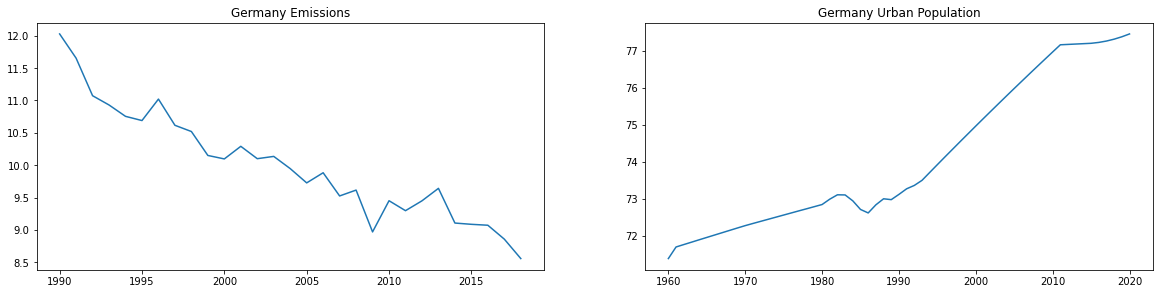

In [90]:
side_by_side(em_df2,urban_df2,'Germany','Emissions','Urban Population')

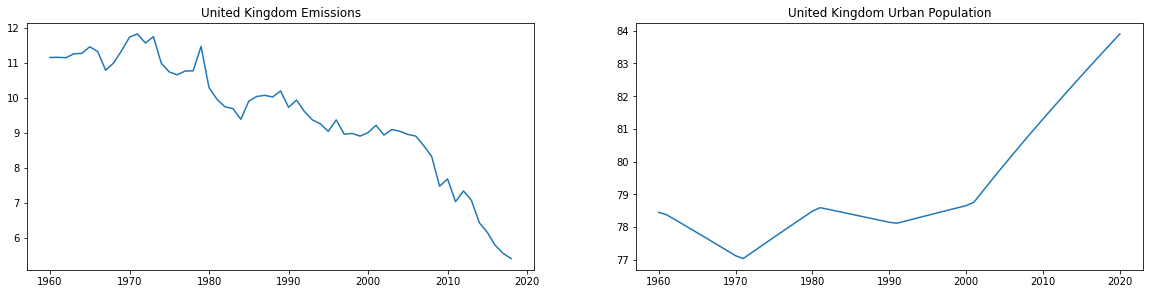

In [91]:
side_by_side(em_df2,urban_df2,'United Kingdom','Emissions','Urban Population')

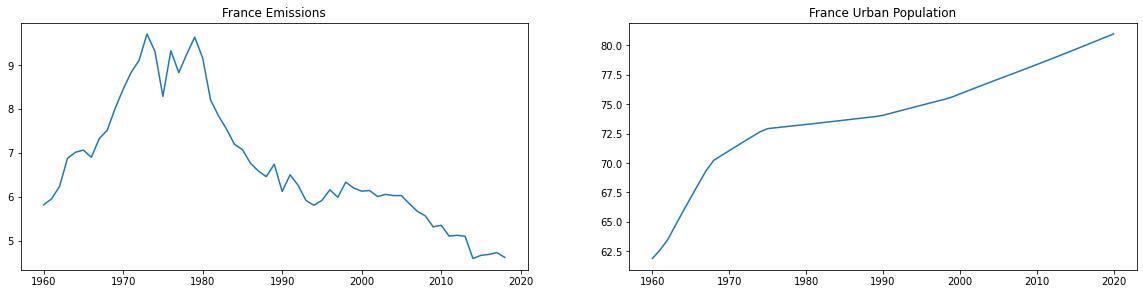

In [92]:
side_by_side(em_df2,urban_df2,'France','Emissions','Urban Population')

It seems like countries in Europe have controlled their carbon emissions very well. Even though their urban population increases their emission have been constantly declining since 1980.

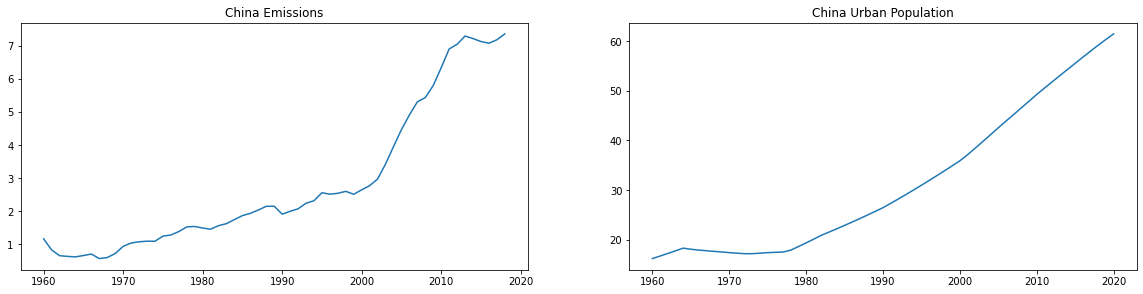

In [61]:
#side by side comparison
side_by_side(em_df2,urban_df2,'China','Emissions','Urban Population')

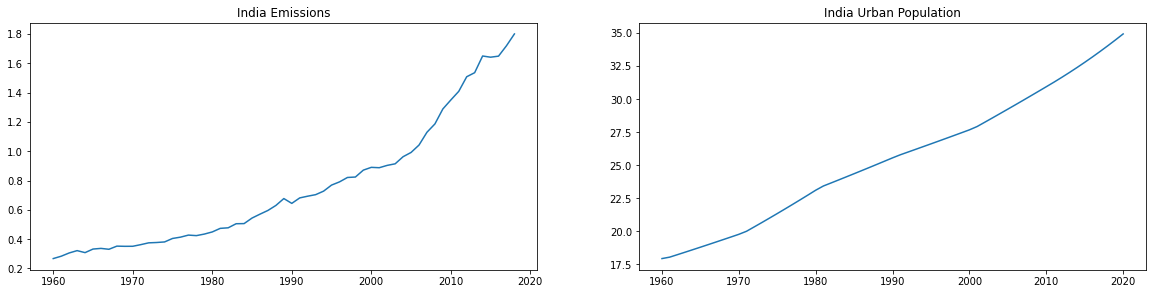

In [62]:
side_by_side(em_df2,urban_df2,'India','Emissions','Urban Population')

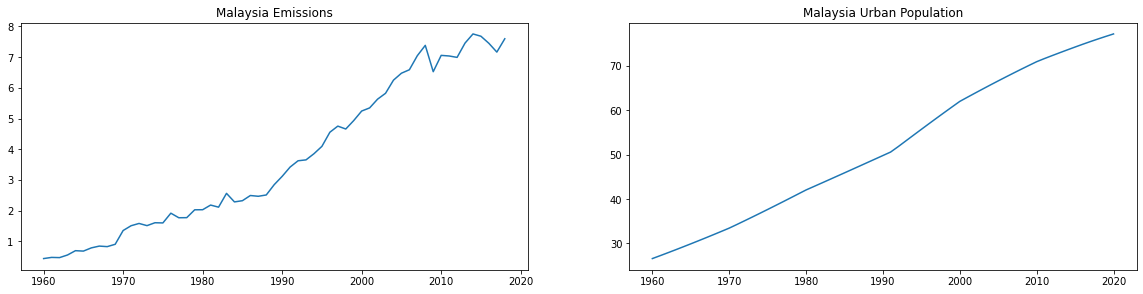

In [65]:
side_by_side(em_df2,urban_df2,'Malaysia','Emissions','Urban Population')

Observing some countries in Asia we see the oposite. Urban population is direclty responsible for the carbon emissions.

Further exploration shows what is the reason for this contrasting data.

When we look at energy consumption from fossil fuel(%) of these countries we find out why the countries in Europe have decreasing emissions

In [76]:
fos_df1, fos_df2 = read_Data('API_EG.USE.COMM.FO.ZS_DS2_en_csv_v2_3930751.csv')

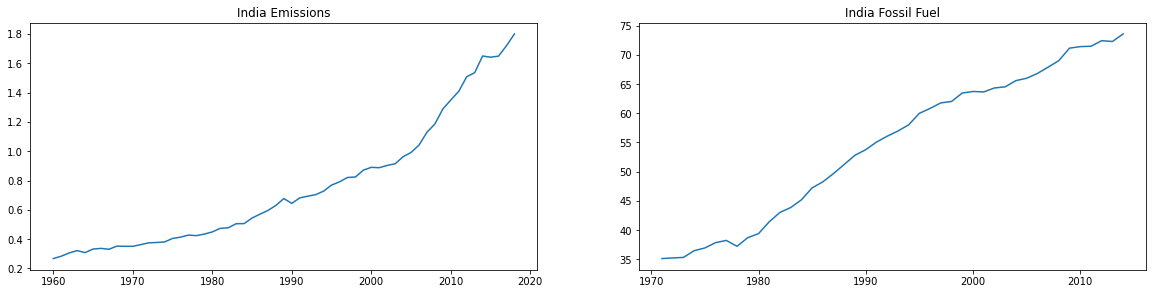

In [77]:
side_by_side(em_df2,fos_df2,'India','Emissions','Fossil Fuel')

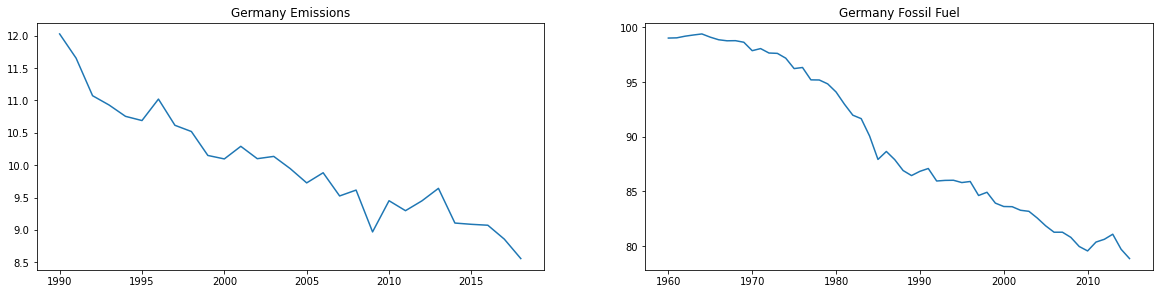

In [78]:
side_by_side(em_df2,fos_df2,'Germany','Emissions','Fossil Fuel')

## Conclusion
In conclusion, urban population is a significant factor in increasing carbon emissions however we also find that controlling fossil fuel energy production will help in keeping the carbon emissions low. The data shows that developed countries are more equipped with the technology to produce electricity using renewable sources. It may also be true that the developed countries' industry uses technology to reduce carbon emissions. The european countries especially also have strict climate change policies which also help control the issue.